In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [52]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head(10)
# print(df.shape)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [53]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [55]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [56]:
df.drop(columns=['id'],inplace = True)

In [57]:
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], dtype = int, drop_first=True)

In [58]:
df.sample(5)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2903,63.0,0,0,Yes,104.79,24.1,0,1,0,0,1,0,0,0,0,0,0
67,76.0,0,0,Yes,104.47,20.3,1,1,0,0,1,0,0,1,0,0,0
4511,82.0,0,0,Yes,82.63,17.9,0,0,0,0,1,0,0,1,0,0,1
2890,65.0,0,0,Yes,236.14,43.1,0,1,0,0,1,0,0,0,0,0,0
4828,32.0,0,0,Yes,83.01,25.8,0,1,0,0,0,0,0,0,0,0,1


In [59]:
married_encoded = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(married_encoded)

In [60]:
df.sample(10)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3758,8.0,0,0,0,77.08,16.9,0,1,0,0,0,0,1,0,0,0,0
141,59.0,0,0,1,116.44,23.8,1,0,0,0,1,0,0,0,0,0,1
3482,38.0,0,0,1,78.94,23.5,0,0,0,0,0,0,0,0,0,0,0
3675,42.0,0,0,1,82.24,23.8,0,0,0,0,1,0,0,0,1,0,0
4157,14.0,0,0,0,111.76,24.8,0,0,0,0,0,0,1,0,0,0,0
871,62.0,1,0,1,77.04,34.7,0,0,0,0,0,0,0,0,0,1,0
3895,30.0,0,0,1,124.37,21.4,0,0,0,0,1,0,0,0,0,1,0
4464,40.0,0,0,0,70.56,32.3,0,0,0,0,0,0,0,0,0,1,0
1312,3.0,0,0,0,97.60,25.8,0,0,0,0,0,0,1,0,0,0,0
248,78.0,0,0,1,78.81,19.6,1,0,0,0,1,0,0,0,0,0,0


In [61]:
import seaborn as sns
from sklearn.model_selection import train_test_split

<Axes: xlabel='stroke', ylabel='count'>

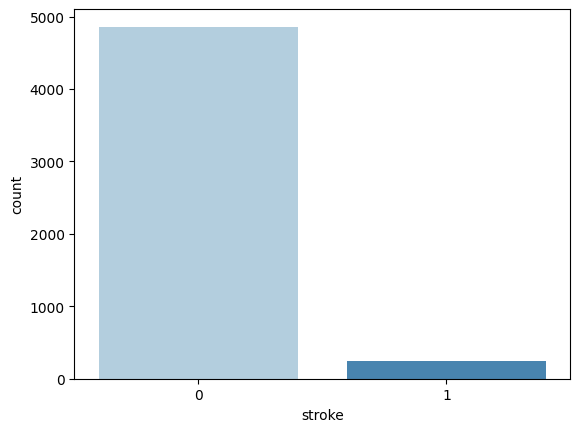

In [62]:
sns.countplot(x = df['stroke'], palette='Blues')

In [92]:
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
X_train_scaled.shape

(4088, 16)

In [101]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [102]:
model = Sequential()

In [109]:
model.add(Dense(3,activation='sigmoid', input_dim = 16 ))
model.add(Dense(1, activation = 'sigmoid'))

In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72 (288.00 B)

 Trainable params: 72 (288.00 B)

 Non-trainable params: 0 (0.00 B)

In [111]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam')

In [133]:
model.fit(X_train_scaled,y_train,epochs = 50, validation_split=0.2)

Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1629 - val_loss: 0.1430
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1592 - val_loss: 0.1431
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1640 - val_loss: 0.1433
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1530 - val_loss: 0.1434
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1535 - val_loss: 0.1435
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1530 - val_loss: 0.1436
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1547 - val_loss: 0.1438
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1480 - val_loss: 0.1439
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1529 - val_loss: 0.1440
Epoch 10/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1701 - val_loss: 0.1441
Epoch 11/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1504 - val_loss: 0.1441
Epoch 12/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [134]:
model.layers[0].get_weights()

[array([[ 2.6273136 , -1.7091838 ,  1.8416865 ],
        [ 0.0291498 , -0.18027566,  1.1439304 ],
        [-0.6189226 , -0.76112735, -0.2941216 ],
        [-0.4556299 ,  0.17116861,  0.39020616],
        [ 0.19687895, -0.12126626,  0.8264686 ],
        [ 1.7465084 ,  0.5633331 , -0.48024395],
        [-0.4755831 ,  0.04989427,  0.71648854],
        [ 0.86353767, -1.7398664 , -0.38859046],
        [-0.4136589 , -1.8695635 , -0.5028689 ],
        [-0.84674937, -0.43173572,  0.13334163],
        [ 0.04317973,  0.04595023, -0.34437686],
        [ 0.13002706, -0.85401887, -0.30095524],
        [-0.21129353, -0.32323512, -0.3200465 ],
        [ 0.02869342, -0.01514839,  0.12344293],
        [-0.89767665, -0.31534192, -0.4476356 ],
        [ 0.5400318 ,  0.3218175 ,  0.3473409 ]], dtype=float32),
 array([-0.4177203 ,  1.4427866 , -0.14524247], dtype=float32)]

In [135]:
y_log = model.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [136]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(y_pred, y_test)

0.9559686888454012